# Predictive Analysis for Retail Banking

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing dataset

In [2]:
dataset = pd.read_csv('bank.csv')
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset['default'].replace(['yes','no'],[1,0],inplace=True)
dataset['housing'].replace(['yes','no'],[1,0],inplace=True)
dataset['loan'].replace(['yes','no'],[1,0],inplace=True)
dataset['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [5]:
dataset["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [6]:
dataset["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


In [8]:
dataset.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [9]:
dataset.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [11]:
dataset.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


In [12]:
dataset.pivot_table(dataset,index="job")

,age,balance,campaign,day,default,deposit,duration,housing,loan,pdays,previous
job,,,,,,,,,,,
admin.,39.374063,1195.866567,2.376312,15.340330,0.008246,0.473013,347.929535,0.554723,0.176912,64.338831,0.973763
blue-collar,39.505144,1203.926440,2.541152,15.235597,0.021091,0.364198,394.658951,0.679527,0.173354,44.061214,0.633230
entrepreneur,42.887195,1621.942073,2.725610,15.442073,0.030488,0.375000,370.182927,0.506098,0.213415,32.746951,0.536585
housemaid,47.445255,1366.160584,2.689781,16.364964,0.029197,0.397810,348.346715,0.277372,0.072993,33.540146,0.503650
management,40.218239,1793.663679,2.588075,15.792284,0.015199,0.507015,361.482073,0.418161,0.101325,54.456352,0.925175
retired,65.424165,2417.250643,2.131105,15.519280,0.006427,0.663239,389.993573,0.158098,0.070694,53.003856,0.994859
self-employed,39.809877,1865.372840,2.533333,15.938272,0.019753,0.461728,396.155556,0.429630,0.138272,45.039506,0.804938
services,38.141928,1081.171181,2.576381,15.728061,0.007584,0.399783,385.955580,0.613218,0.166847,51.546046,0.684724
student,26.102778,1500.783333,2.169444,15.175000,0.002778,0.747222,330.672222,0.141667,0.002778,68.683333,1.297222


In [13]:
dataset.pivot_table(dataset,index='month')

,age,balance,campaign,day,default,deposit,duration,housing,loan,pdays,previous
month,,,,,,,,,,,
apr,40.247021,1734.264355,1.833153,18.630553,0.007584,0.625135,398.721560,0.517876,0.087757,80.005417,0.980498
aug,42.826860,1580.872943,3.514812,15.494404,0.013825,0.452930,352.072416,0.183673,0.078999,32.930217,0.624753
dec,45.745455,2735.209091,2.181818,14.481818,0.000000,0.909091,397.054545,0.181818,0.027273,113.172727,2.218182
feb,41.943299,1568.166237,2.155928,8.541237,0.006443,0.568299,343.125000,0.324742,0.117268,72.426546,1.304124
jan,42.345930,1151.093023,1.729651,25.773256,0.017442,0.412791,349.482558,0.235465,0.136628,62.619186,1.290698
jul,41.123514,1061.122193,3.294584,18.407530,0.030383,0.414135,418.867239,0.440555,0.268164,24.017834,0.363276
jun,41.539280,1601.206219,2.853519,11.293781,0.021277,0.446809,364.742226,0.364975,0.114566,21.918167,0.505728
mar,43.427536,2118.605072,2.003623,13.438406,0.000000,0.898551,291.369565,0.224638,0.047101,66.322464,1.242754
may,38.728754,1192.357649,2.328258,15.510623,0.014873,0.327550,378.363669,0.839589,0.134207,56.211402,0.734065


In [14]:
dataset.pivot_table(dataset,index='marital')

,age,balance,campaign,day,default,deposit,duration,housing,loan,pdays,previous
marital,,,,,,,,,,,
divorced,47.365043,1371.835267,2.457077,15.689869,0.021655,0.481052,392.481825,0.483372,0.155452,46.651199,0.664346
married,44.533617,1599.927570,2.621477,15.678791,0.014328,0.433790,361.063769,0.488899,0.143757,49.505432,0.822233
single,33.017339,1457.255259,2.323195,15.608869,0.013928,0.543491,384.195566,0.440875,0.098351,56.344798,0.913019


In [15]:
dataset.pivot_table(dataset,index='education')

,age,balance,campaign,day,default,deposit,duration,housing,loan,pdays,previous
education,,,,,,,,,,,
primary,48.220667,1523.031333,2.646000,15.510667,0.019333,0.394000,383.803333,0.494667,0.136667,39.976667,0.688000
secondary,40.086012,1296.480278,2.470051,15.568846,0.014974,0.447407,373.344960,0.533419,0.158145,53.302045,0.821768
tertiary,39.513147,1845.869070,2.487395,15.782597,0.013012,0.541068,368.627812,0.391434,0.098401,53.120629,0.924370
unknown,45.523139,1746.605634,2.672032,16.160966,0.018109,0.507042,346.448692,0.350101,0.052314,50.585513,0.706237


In [16]:
dataset['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# Data Visualization

Text(0.5, 0, 'balance')

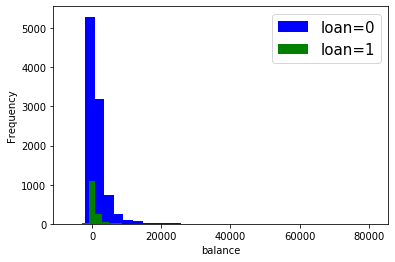

In [17]:

dataset[dataset['loan']==0]['balance'].plot.hist(bins=30,color='blue', label='loan=0')
dataset[dataset['loan']==1]['balance'].plot.hist(bins=30, color='green', label='loan=1')
plt.legend(fontsize=15)
plt.xlabel("balance")

Text(0.5, 0, 'age')

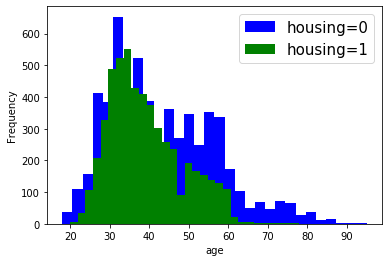

In [18]:
dataset[dataset['housing']==0]['age'].plot.hist(bins=30,color='blue', label='housing=0')
dataset[dataset['housing']==1]['age'].plot.hist(bins=30, color='green', label='housing=1')
plt.legend(fontsize=15)
plt.xlabel("age")

Text(0.5, 0, 'duration')

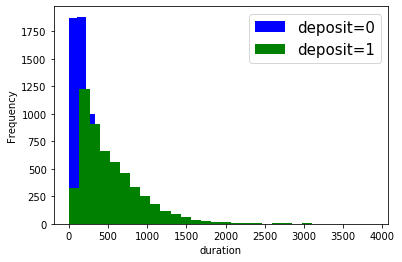

In [19]:
dataset[dataset['deposit']==0]['duration'].plot.hist(bins=30,color='blue', label='deposit=0')
dataset[dataset['deposit']==1]['duration'].plot.hist(bins=30, color='green', label='deposit=1')
plt.legend(fontsize=15)
plt.xlabel("duration")

Text(0, 0.5, 'balance')

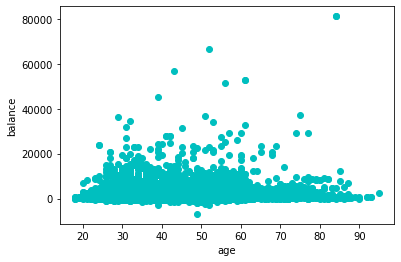

In [20]:
%matplotlib inline
plt.scatter(dataset["age"],dataset["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")

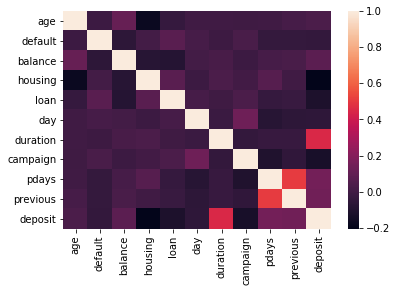

In [21]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [22]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


Text(0.5, 0, 'month')

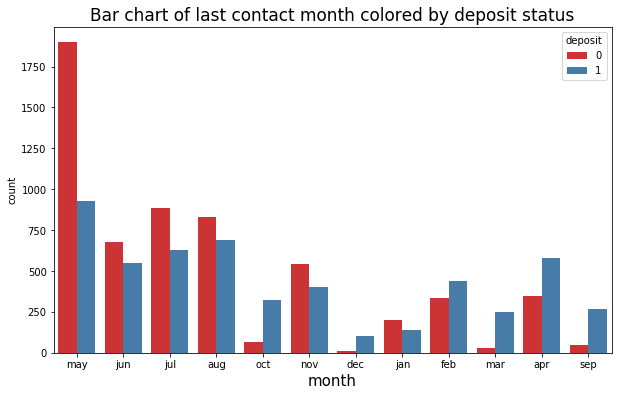

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("month", fontsize=15)

Text(0.5, 0, 'contact')

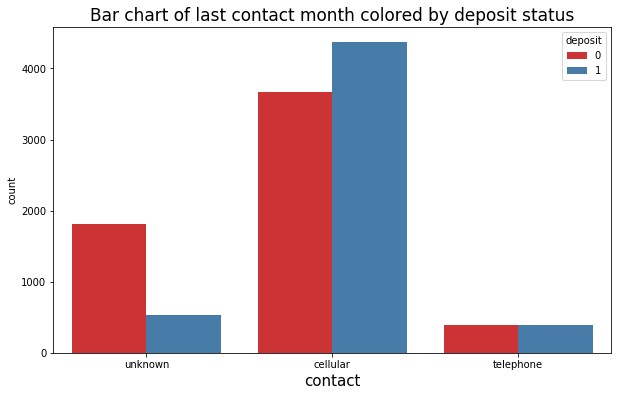

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='contact',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("contact", fontsize=15)

Text(0.5, 0, 'marital')

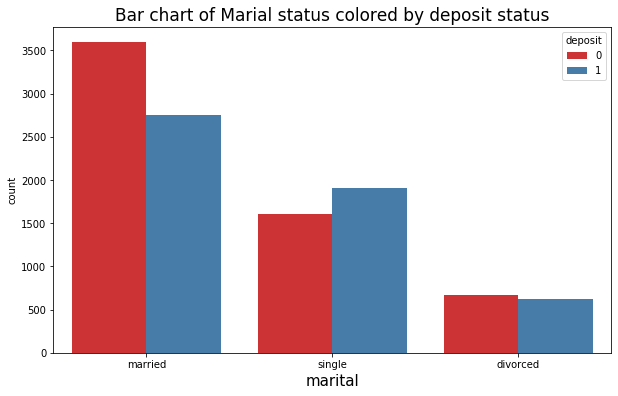

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of Marial status colored by deposit status", fontsize=17)
plt.xlabel("marital", fontsize=15)


Text(0.5, 0, 'poutcome')

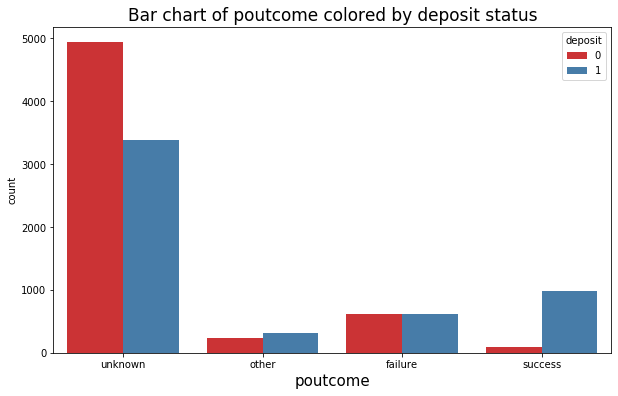

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of poutcome colored by deposit status", fontsize=17)
plt.xlabel("poutcome", fontsize=15)

Text(0.5, 0, 'education')

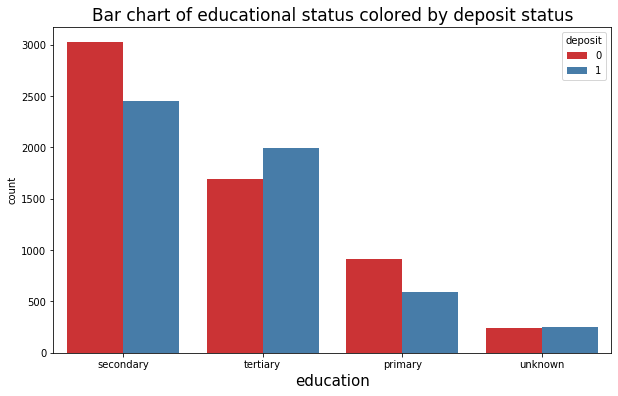

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of educational status colored by deposit status", fontsize=17)
plt.xlabel("education", fontsize=15)

Text(0.5, 0, 'job')

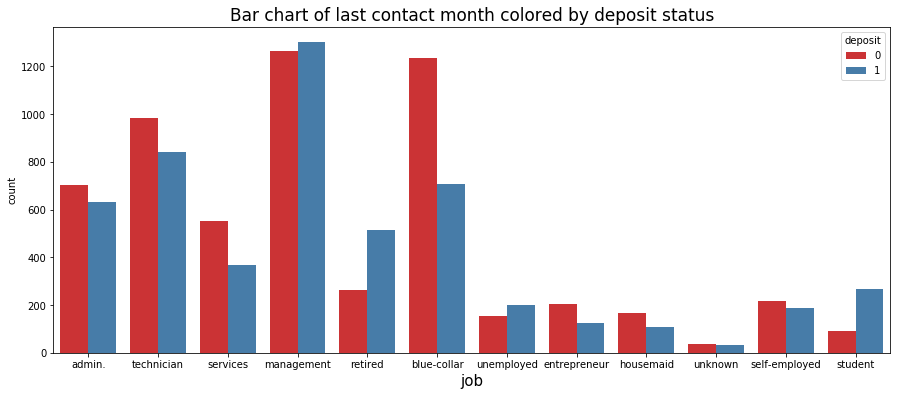

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',hue='deposit', data=dataset,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("job", fontsize=15)

Text(0, 0.5, 'Duration')

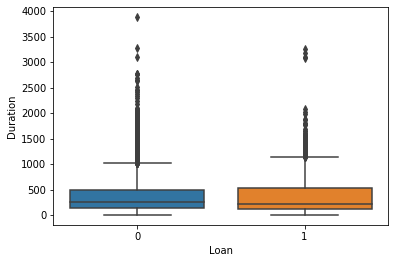

In [29]:
sns.boxplot(x=dataset['loan'],y=dataset['duration'])
plt.xlabel("Loan")
plt.ylabel("Duration")

# Handling the Missing data

In [30]:
dataset.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [31]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [33]:
dataset.iloc[:,1]=lb.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=lb.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,3]=lb.fit_transform(dataset.iloc[:,3])
dataset.iloc[:,8]=lb.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,10]=lb.fit_transform(dataset.iloc[:,10])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,unknown,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,unknown,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,unknown,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,unknown,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,unknown,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,unknown,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,unknown,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,failure,0


In [34]:
x=dataset.iloc[:,:16].values
x

array([[59, 0, 1, ..., -1, 0, 'unknown'],
       [56, 0, 1, ..., -1, 0, 'unknown'],
       [41, 9, 1, ..., -1, 0, 'unknown'],
       ...,
       [32, 9, 2, ..., -1, 0, 'unknown'],
       [43, 9, 1, ..., 172, 5, 'failure'],
       [34, 9, 1, ..., -1, 0, 'unknown']], dtype=object)

In [35]:
y=dataset.iloc[:,16:].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

# One Hot Encoding

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
ct=ColumnTransformer([("on",OneHotEncoder(),[15])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2, -1, 0],
       [1.0, 0.0, 0.0, ..., 2, 172, 5],
       [0.0, 0.0, 0.0, ..., 1, -1, 0]], dtype=object)

In [38]:
x=x[:,1:]
x

array([[0.0, 0.0, 1.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 2, -1, 0],
       [0.0, 0.0, 0.0, ..., 2, 172, 5],
       [0.0, 0.0, 1.0, ..., 1, -1, 0]], dtype=object)

In [39]:
x.shape

(11162, 18)

# Feature Scaling

In [40]:
from sklearn import preprocessing


In [41]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit_transform(x)

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.01612903, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01612903, 0.20233918,
        0.0862069 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

# Splitting training and testing data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [44]:
x_train

array([[0.0, 0.0, 1.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 3, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, 88, 4],
       ...,
       [0.0, 0.0, 1.0, ..., 8, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0]], dtype=object)

In [45]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [46]:
x_test

array([[0.0, 0.0, 0.0, ..., 1, 336, 2],
       [0.0, 1.0, 0.0, ..., 1, 192, 4],
       [0.0, 0.0, 1.0, ..., 2, -1, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 2, -1, 0],
       [0.0, 0.0, 1.0, ..., 1, -1, 0],
       [0.0, 0.0, 1.0, ..., 7, -1, 0]], dtype=object)

In [47]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [48]:
from joblib import dump
dump(minmax,"scalar.save")

['scalar.save']

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=None, random_state=0)
rmf.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
import pickle
pickle.dump(rmf,open('decision.pkl','wb'))

In [51]:
y_pred=rmf.predict(x_test)

In [52]:
print('Actual Deposit')
print(y_test)

Actual Deposit
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [53]:
print('Predicted Deposit')
print(y_pred)

Predicted Deposit
[0 1 0 ... 0 0 0]


In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred)))
print("ROC score : %f" %(roc_auc_score(y_test, y_pred)))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))


Accuracy score: 0.850492
ROC score : 0.851825
Confusion Matrix :
[[497 100]
 [ 67 453]]
